In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
X = iris.data
y = iris.target

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
clf = DecisionTreeClassifier()

In [9]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
y_pred = clf.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
accuracy_score(y_test, y_pred)

0.9

In [13]:
from sklearn.tree import plot_tree

[Text(0.5714285714285714, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [43, 37, 40]'),
 Text(0.42857142857142855, 0.75, 'gini = 0.0\nsamples = 43\nvalue = [43, 0, 0]'),
 Text(0.7142857142857143, 0.75, 'x[3] <= 1.75\ngini = 0.499\nsamples = 77\nvalue = [0.0, 37.0, 40.0]'),
 Text(0.5714285714285714, 0.5833333333333334, 'x[2] <= 5.35\ngini = 0.139\nsamples = 40\nvalue = [0, 37, 3]'),
 Text(0.42857142857142855, 0.4166666666666667, 'x[1] <= 2.25\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(0.2857142857142857, 0.25, 'x[2] <= 4.75\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.14285714285714285, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.42857142857142855, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5714285714285714, 0.25, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.7142857142857143, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8571428571

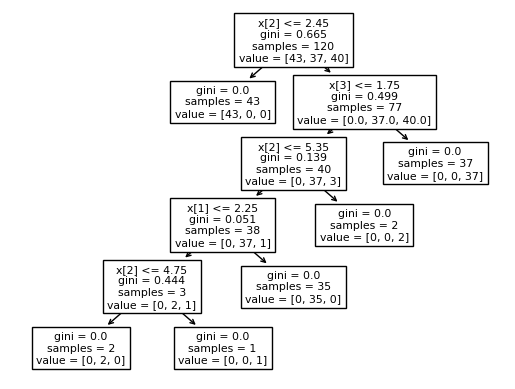

In [14]:
plot_tree(clf)

In [15]:
ds = pd.read_csv('Social_Network_Ads.csv')

In [16]:
ds.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [17]:
ds.sum()

User ID                                                   6276615903
Gender             MaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFe...
Age                                                            15062
EstimatedSalary                                             27897000
Purchased                                                        143
dtype: object

In [18]:
ds['Gender'].replace({'Male':0, 'Female':1}, inplace=True)

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_1188\3495359730.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds['Gender'].replace({'Male':0, 'Female':1}, inplace=True)
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_1188\3495359730.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds['Gender'

In [19]:
ds.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [20]:
X = ds.iloc[:, 1:4].values
y = ds.iloc[:, -1].values

In [21]:
y.shape

(400,)

In [22]:
clf1 = DecisionTreeClassifier(max_depth=3)

In [23]:
clf1.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [24]:
def analyzer(max_depth):
    data = pd.read_csv('Social_Network_Ads.csv')
    X = data.iloc[:, 2:4].values
    y = data.iloc[:, -1].values

    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X,y)

    a = np.arange(start=X[:, 0].min()-1, stop=X[:, 0].max()+1, step=0.1)
    b = np.arange(start=X[:, 1].min()-1, stop=X[:, 1].max()+1, step=100)

    XX, YY = np.meshgrid(a, b)

    input_array = np.array([XX.ravel(), YY.ravel()]).T

    labels = clf.predict(input_array)

    plt.contourf(XX,YY, labels.reshape(XX.shape), alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y)

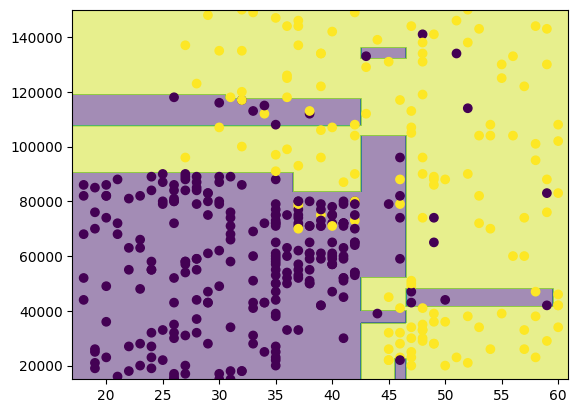

In [31]:
analyzer(6)

In [26]:
import matplotlib.pyplot as plt